## Lab09 - FP Mining
Name: Anh Kieu  
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2021  
Instructor: Brian King  

#### 1) Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#### 2) Testing mlxtend

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [4]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


#### 3) [P] Show the result of describe() and info() on your dataframe.

In [5]:
df.describe()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
count,5,5,5,5,5,5,5,5,5,5,5
unique,2,2,2,2,2,1,2,2,2,2,2
top,False,False,False,True,False,True,True,False,True,False,True
freq,4,3,4,4,4,5,3,3,3,4,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         5 non-null      bool 
 1   Corn          5 non-null      bool 
 2   Dill          5 non-null      bool 
 3   Eggs          5 non-null      bool 
 4   Ice cream     5 non-null      bool 
 5   Kidney Beans  5 non-null      bool 
 6   Milk          5 non-null      bool 
 7   Nutmeg        5 non-null      bool 
 8   Onion         5 non-null      bool 
 9   Unicorn       5 non-null      bool 
 10  Yogurt        5 non-null      bool 
dtypes: bool(11)
memory usage: 183.0 bytes


#### 4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a min_support of 0.6. 
Show the resulting dataframe, and store the result, since you'll have many selection
exercises next. All selection exercises must be done from this resulting frame. Set use_colnames=True.
It'll be much easier to interpret your patterns.

In [7]:
ap_df = apriori(df, min_support=0.6, use_colnames = True)
ap_df

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


#### 5) [P] Select all frequent itemsets that have support => 0.8

In [8]:
ap_df[ap_df['support'] >= 0.8]

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
5,0.8,"(Eggs, Kidney Beans)"


#### 6) [P] Select all frequent itemsets with at least 2 items.

In [9]:
ap_df[ap_df['itemsets'].apply(lambda x: len(x)) >= 2]

,support,itemsets
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


#### 7) [P] Select the frequent itemsets that contain an 'Onion' in the itemset.

In [10]:
ap_df[ap_df['itemsets'].apply(lambda x: 'Onion' in x)]

,support,itemsets
3,0.6,(Onion)
6,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


#### 8) [P] Select the frequent itemsets that contain both 'Onion' and 'Eggs' in the itemset.

In [11]:
ap_df[ap_df['itemsets'].apply(lambda x: {'Onion', 'Eggs'}.issubset(x))]

,support,itemsets
6,0.6,"(Onion, Eggs)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


#### 9) [P] Select the frequent itemsets that contain either an 'Onion' or 'Kidney Beans'

In [12]:
ap_df[ap_df['itemsets'].apply(lambda x: {'Onion'}.issubset(x) or {'Kidney Beans'}.issubset(x))]

,support,itemsets
1,1.0,(Kidney Beans)
3,0.6,(Onion)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


#### 10) Generate rules with a minimum confidence of 0.7. Store your resulting data frame called rules. Show the entire data frame.

In [13]:
rules = association_rules(ap_df, metric = 'confidence', min_threshold = 0.7)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


#### 11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [15]:
rules.sort_values(['lift', 'confidence'], ascending = [False, False]).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
10,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


#### 12) [P] Select all rules that have a 1.0 support for the antecedent.

In [16]:
rules[rules['antecedent support'] == 1.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0


#### 13) [P] Select all rules that have at least 3 or more items represented in the rule

In [17]:
m = rules.apply(lambda row: len(row['antecedents'].union(row['consequents'])) >= 3 , axis = 1)
rules[m]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
10,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


#### 14) [P] Select the rules that have confidence >= 0.75 and a lift > 1

In [18]:
rules[(rules['confidence'] >= 0.75) & (rules['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
10,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


#### 15) [P] Read in the Chipotle dataset:

In [19]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

In [20]:
df_chip.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 16) [P] Show the result of df_chip.info(verbose=True) You should have five variables.

In [21]:
df_chip.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


#### 17) [P] Show the result of describe(include='all')

In [22]:
df_chip.describe(include = 'all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


#### 18) [P] Show the first 10 observations

In [23]:
df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 19) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types.

3 variables that need to be transformed are item_name, choice_description and item_price.  
For item_name, we can make it a categorical variable  
For choice_description, we can turn it into boolean array
For item_price, we can turn it into float

#### 20) [P] Let's start doing some preprocessing. Convert the item_price field to a floating-point number, 
and then
show the result of df_chip.item_price.describe() to show that it is indeed a numeric variable
now.

In [24]:
df_chip['item_price'] = df_chip['item_price'].apply(lambda x: x[1:])
df_chip['item_price'] = df_chip['item_price'].astype('float32')

In [25]:
df_chip.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

#### 21) [P] Now, convert the item_name to a categorical variable.

In [26]:
df_chip['item_name'] = pd.Categorical(df_chip['item_name'])

In [27]:
df_chip.item_name.describe()

count             4622
unique              50
top       Chicken Bowl
freq               726
Name: item_name, dtype: object

#### 22) [P] How many unique item_name values are there?

In [28]:
df_chip.item_name.describe()['unique']

50

#### 23) [P] Show all of the unique values in item_name . Do you see any potential problems?

In [29]:
df_chip['item_name'].unique()

['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl', ..., 'Barbacoa Salad Bowl', 'Salad', 'Veggie Crispy Tacos', 'Veggie Salad', 'Carnitas Salad']
Length: 50
Categories (50, object): ['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', ..., 'Salad', 'Veggie Crispy Tacos', 'Veggie Salad', 'Carnitas Salad']

#### 24) [P] How many distinct orders are there?

In [30]:
len(df_chip['order_id'].unique())

1834

#### 25) [PM] Show a boxplot of the number of line items per order.

Text(0, 0.5, 'num_unique')

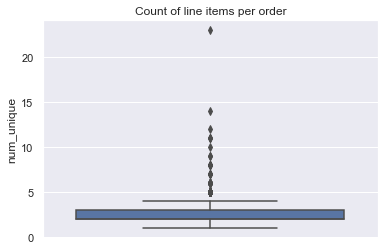

In [31]:
counts = df_chip.groupby('order_id').count()
sns.set_theme()
ax = sns.boxplot(y = counts['quantity'], orient = "v") 
# we can use quantity as quantity does not have null rows, and thus when we use count, we are counting all the lines in one order_id
ax.set_title("Count of line items per order")
ax.set_ylabel("num_unique")

The distribution is skewed normal, with a lot of outliers to the right (upper outliers)

#### 26 [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order.

Text(0, 0.5, 'total_items')

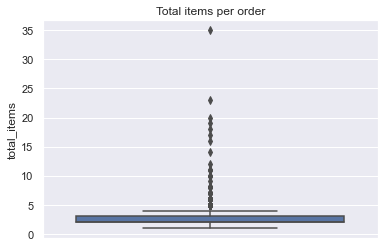

In [32]:
counts = df_chip.groupby('order_id').sum()
sns.set_theme()
ax = sns.boxplot(y = counts['quantity'], orient = "v") 
# we can use quantity as quantity does not have null rows, and thus when we use count, we are counting all the lines in one order_id
ax.set_title("Total items per order")
ax.set_ylabel("total_items")

#### 27) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be sure to consider the quantity of each item ordered!

In [33]:
items_count = df_chip.groupby(['item_name']).sum().sort_values(['quantity'], ascending = False)

In [34]:
items_count['quantity'].head(5)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

#### 28) [P] What is the total number of "Steak Burrito" ordered?

In [35]:
items_count.at['Steak Burrito', 'quantity']

386

#### 29) [P] What is mean price for an order

In [36]:
df_chip.groupby(['order_id']).sum().mean()['item_price']

18.81142807006836

#### 30) [P] What was total revenue for the day?

In [37]:
df_chip['item_price'].sum()

34500.16

#### 31) [P] What was the largest total price for a single order? Show the order number and the total price.

In [38]:
df_chip.groupby('order_id').sum().sort_values(['item_price'], ascending = False)['item_price'].head(1)

order_id
926    205.25
Name: item_price, dtype: float32

#### 32) [P] Show the entire order to your answer to the previous question

In [39]:
df_chip[df_chip['order_id'] == 926]

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


### Frequent patterns in chipotle data

#### 35) Transform this dataset to a collection of binary encoded transactions, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle.

In [40]:
trans_bool = pd.get_dummies(df_chip['item_name'], dtype = bool)
trans_bool.index = df_chip['order_id']

In [41]:
trans_bool = trans_bool.groupby("order_id").any()

In [42]:
trans_bool.shape

(1834, 50)

#### 36) [P] Show the first 10 observations from your transaction data

In [43]:
trans_bool.head(10)

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### 37) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?

In [44]:
apriori(trans_bool, min_support = 0.5)

,support,itemsets


There are no frequent itemsets that satisfy this threshold

#### 38) Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least.

In [45]:
abs_supp = trans_bool.sum().sort_values(ascending = False)
report_supp = pd.DataFrame({'abs_supp': abs_supp, 'rel_supp %': abs_supp*100/trans_bool.shape[0]})
report_supp.head(5)

,abs_supp,rel_supp %
Chicken Bowl,615,33.533261
Chicken Burrito,489,26.663032
Chips and Guacamole,474,25.845147
Steak Burrito,342,18.647764
Canned Soft Drink,276,15.049073


#### 39) Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report your frequent items sorted by decreasing support order.

In [46]:
ap_item = apriori(trans_bool, min_support = 0.005, use_colnames = True)
ap_item.sort_values('support',ascending = False)

,support,itemsets
11,0.335333,(Chicken Bowl)
12,0.266630,(Chicken Burrito)
18,0.258451,(Chips and Guacamole)
29,0.186478,(Steak Burrito)
7,0.150491,(Canned Soft Drink)
...,...,...
109,0.005453,"(Chicken Crispy Tacos, Chips and Guacamole)"
132,0.005453,"(Steak Burrito, Steak Soft Tacos)"
131,0.005453,"(Steak Bowl, Veggie Bowl)"
112,0.005453,"(Steak Bowl, Chicken Salad Bowl)"


In [47]:
print(f"There are {ap_item.shape[0]} frequent itemsets")

There are 146 frequent itemsets


#### 40) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

- support: Fraction of the transactions containing that itemsets over the total itemsets  
- confidence:  Fraction of the transactions that contains the consequence items given transactions that have antecedent items  
- lift: Measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. It is the ratio of confidence(A|C)/support(C)   
- leverage: Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.  
- conviction: A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.  
REF: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

#### 41) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [48]:
rules = association_rules(ap_item, metric = 'support', min_threshold = 0.01)

In [49]:
print(f"There are {rules.shape[0]} rules.")

There are 108 rules.


#### 42) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [50]:
rules[rules["lift"] > 2].sort_values('confidence', ascending = False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
90,"(Chips, Bottled Water)",(Chicken Bowl),0.019084,0.335333,0.015267,0.8,2.385691,0.008868,3.323337


#### 43) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist.

Based on our findings, we first know what are the ratios of transactions containing the items are. Firstly, we know that 1.9% of all transactions contain Bottle Water and Chips, 33.5% of all transactions contain Chicken Bowl, and 1.5% of all transactions contain Bottled Water, Chips and Chicken Bowl. Among all the transactions that contain Bottled Water and Chips, 80% of them contain Chicken Bowl. Here, based on our lift measurement, we also know that Bottle Water, Chips and Chicken Bowl are not independent, even more, the consumption of Bottle Water and Chip is positively correlated to Chicken Bowl consumption.

#### 44) [P] Suppose your boss is interested in what items are most likely related to a purchase of "Chips and Guacamole".
Using your rule set generated, first select the rules that have "Chips and Guacamole"
listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings.
Identify the item(s) that are the most suggestive of including "Chips and Guacamole" when purchased,
and state why.

In [51]:
rules[rules['consequents'].apply(lambda x: {'Chips and Guacamole'}.issubset(x))].sort_values(['confidence', 'lift'], ascending = [False, False]).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443
89,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682
86,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581
74,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943
82,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675


Based on confidence and lift, we recognize that a high percentage (38.9%) of transactions that contain 6 Pack Soft Drink also contain Chips and Guacamole. We also see that 6 Pack Soft Drink consumption is also positively correlated to Chips and Guac consumption. Other than 6 Pack Soft Drink, we also see some other antecedents for Chips and Guac such as Veggie Burrito or Veggie Bowl.

#### 45) Process all of the items listed in the "choice_description" field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowl.

In [52]:
chick_bowls = df_chip[df_chip['item_name'] == 'Chicken Bowl']

In [53]:
chick_bowls

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [54]:
def str_to_list(s):
    res = s.replace('[', '').replace(']', '').split(', ')
    return res

In [55]:
chick_bowls['flat_des'] = chick_bowls['choice_description'].apply(lambda row: str_to_list(row))
chick_bowls.head()

<ipython-input-55-851bf4b058ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chick_bowls['flat_des'] = chick_bowls['choice_description'].apply(lambda row: str_to_list(row))


,order_id,quantity,item_name,choice_description,item_price,flat_des
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,"[Tomatillo-Red Chili Salsa (Hot), Black Beans,..."
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,"[Fresh Tomato Salsa (Mild), Rice, Cheese, Sour..."
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,"[Fresh Tomato Salsa, Fajita Vegetables, Rice, ..."
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,"[Tomatillo Red Chili Salsa, Fajita Vegetables,..."
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,"[Roasted Chili Corn Salsa (Medium), Pinto Bean..."


In [56]:
# Binary
te = TransactionEncoder()
dataset = chick_bowls['flat_des']
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(3)

,Black Beans,Cheese,Fajita Vegetables,Fajita Veggies,Fresh Tomato (Mild),Fresh Tomato Salsa,Fresh Tomato Salsa (Mild),Guacamole,Lettuce,Pinto Beans,Rice,Roasted Chili Corn Salsa,Roasted Chili Corn Salsa (Medium),Sour Cream,Tomatillo Green Chili Salsa,Tomatillo Red Chili Salsa,Tomatillo-Green Chili Salsa (Medium),Tomatillo-Red Chili Salsa (Hot),White Rice
0,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1,False,True,False,False,False,False,True,True,True,False,True,False,False,True,False,False,False,False,False
2,False,True,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False


#### 46) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the choice_description items used with Chicken Bowls. Explain your findings.

In [57]:
df.sum().sort_values(ascending = False).head(5)/df.shape[0]

Rice           0.942149
Cheese         0.756198
Lettuce        0.610193
Sour Cream     0.588154
Black Beans    0.531680
dtype: float64

Notes: There are items with high relative support.

In [58]:
# frequent itemset, I pick
ap_chick = apriori(df, min_support = 0.5, use_colnames = True)

In [59]:
rules_chick = association_rules(ap_chick, metric = 'confidence', min_threshold = 0.5)

In [60]:
rules_chick.sort_values(['confidence', 'lift'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Sour Cream),(Rice),0.588154,0.942149,0.573003,0.974239,1.034061,0.018874,2.245680
6,(Lettuce),(Rice),0.610193,0.942149,0.588154,0.963883,1.023068,0.013262,1.601756
3,(Cheese),(Rice),0.756198,0.942149,0.725895,0.959927,1.018870,0.013444,1.443651
1,(Black Beans),(Rice),0.531680,0.942149,0.508264,0.955959,1.014658,0.007342,1.313563
4,(Sour Cream),(Cheese),0.588154,0.756198,0.506887,0.861827,1.139683,0.062126,1.764463
2,(Rice),(Cheese),0.942149,0.756198,0.725895,0.770468,1.018870,0.013444,1.062168
5,(Cheese),(Sour Cream),0.756198,0.588154,0.506887,0.670310,1.139683,0.062126,1.249190
7,(Rice),(Lettuce),0.942149,0.610193,0.588154,0.624269,1.023068,0.013262,1.037463
9,(Rice),(Sour Cream),0.942149,0.588154,0.573003,0.608187,1.034061,0.018874,1.051129
0,(Rice),(Black Beans),0.942149,0.531680,0.508264,0.539474,1.014658,0.007342,1.016922


I first set rules to generate frequent itemsets as "if the combination of items occur at least half of the time, I consider it to be frequent itemsets" (support >= 0.5). Then, I generate association rules based on confidence metric, with a min_threshold of 0.5, meaning among the transactions that contain explanatory items, there has to be at least 50% of the time the resulting items are in those transactions. Then, I sort them by that confidence/conditional probability ratio to see which one has the highest ratio among the transactions containing explanatory items. I also look at lift to see whether it truly indicates positive correlation.  
In general, the confidences are high but lift are surprisingly close to 1, which means that the items are independent. Thus, we might see some correlation, meaning they are frequently bought together but not causation, i.e Sour Cream consumption does not cause the consumption of Rice., but they are frequently bought together.